## Project Overview

This project focuses on analyzing and predicting heart disease using the UCI Heart Disease dataset. The dataset contains medical attributes of patients, which help determine their risk level for heart disease. The goal is to classify whether a patient has no heart disease (0) or has a heart condition (1). This is a multiclass classification problem, where we will explore patterns and trends in the data before building a predictive model.

## Dataset Description

The dataset consists of 14 key attributes that describe patient demographics, clinical test results, and medical conditions. Below is an overview of these attributes

**Column	Description**
- **id:**        Unique ID for each patient
- **age:**	    Age of the patient (years).
- **origin:**	Place where the study was conducted.
- **sex:**	    Sex of the patient (0 = Female, 1 = Male).
- **cp:**	    Chest pain type: 0 = Asymptomatic, 1 = Typical Angina, 2 = Atypical Angina, 3 = Non-Anginal Pain.
- **trestbps:**	Resting blood pressure (in mm Hg) on admission to the hospital.
- **chol:**	    Serum cholesterol level (mg/dL).
- **fbs:**	    Fasting blood sugar (1 = >120 mg/dL, 0 = Normal).
- **restecg:**	Resting electrocardiographic results: 0 = Normal, 1 = ST-T wave abnormality, 2 = Left ventricular hypertrophy.
- **thalach:**	Maximum heart rate achieved during a stress test.
- **exang:**	    Exercise-induced angina (1 = Yes, 0 = No).
- **oldpeak:**	ST depression induced by exercise relative to rest (measures ischemia).
- **slope:**	    Slope of the peak exercise ST segment: 0 = Upsloping, 1 = Flat, 2 = Downsloping.
- **ca:**	    Number of major blood vessels (0–3) colored by fluoroscopy.
- **thal:**	    Thalassemia: 1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect.
- **num:**	    Target variable (heart disease presence): 0 = No Disease, 1= Different Stages of Heart Disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## read the dataset
df = pd.read_csv('Data\heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
## shape of the dataset
df.shape

(920, 16)

In [4]:
## dataset description

df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


Here are the insights based solely on the data:

- Age: Ranges from 28 to 77 years, with a median of 54.
- Resting Blood Pressure (trestbps): Ranges from 0 to 200, with a mean of 132 mm Hg.
- Cholesterol (chol): Ranges from 0 to 603 mg/dL, with a mean of 199 mg/dL.
- Maximum Heart Rate (thalach): Ranges from 60 to 202 bpm, with a mean of 137 bpm.
- Oldpeak: Ranges from -2.6 to 6.2, with a mean of 0.88.
- Number of Major Blood Vessels (ca): Ranges from 0 to 3, with a median of 0.
- Heart Disease (num): The target variable has values from 0 to 4.
- Missing Values: Some columns have missing values (e.g., trestbps, chol, thalach, oldpeak, ca).
- Class Distribution: The target variable has a class distribution with values from 0 (no heart disease) to 4 (heart disease stages).

In [5]:
## Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
## Detect null values and duplicates

df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [7]:
df = df.rename({'num':'heart_disease', 'dataset':'origin', 'sex':'gender'}, axis=1)
df['heart_disease'] = df['heart_disease'].apply(lambda x: 1 if x>0 else 0)
df.head()

,id,age,gender,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,heart_disease
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [8]:
df['heart_disease'].value_counts()

heart_disease
1    509
0    411
Name: count, dtype: int64

## Univariate Analysis

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols]

print(f"Categorical columns : {cat_cols}")
print(f"Numeraical columns : {num_cols}")

Categorical columns : ['gender', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numeraical columns : ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'heart_disease']


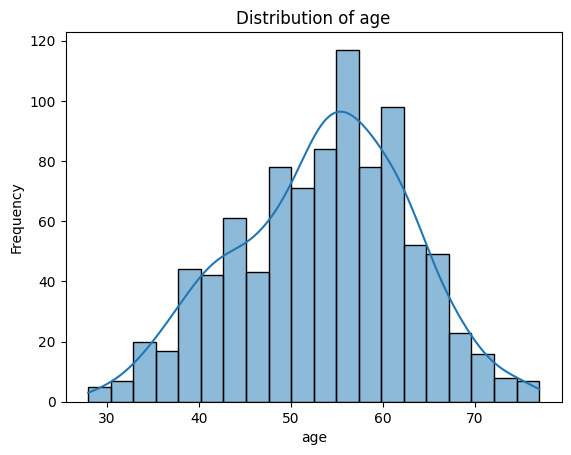

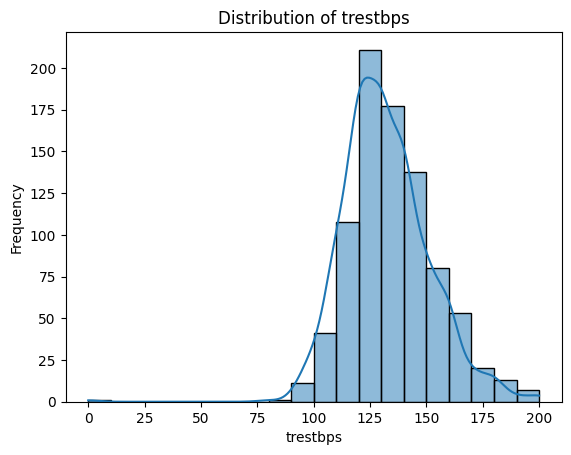

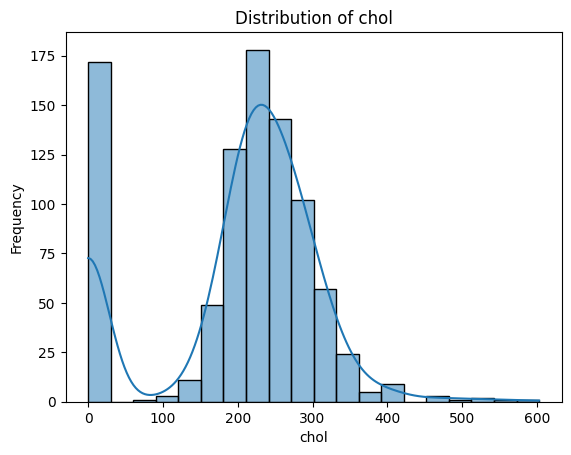

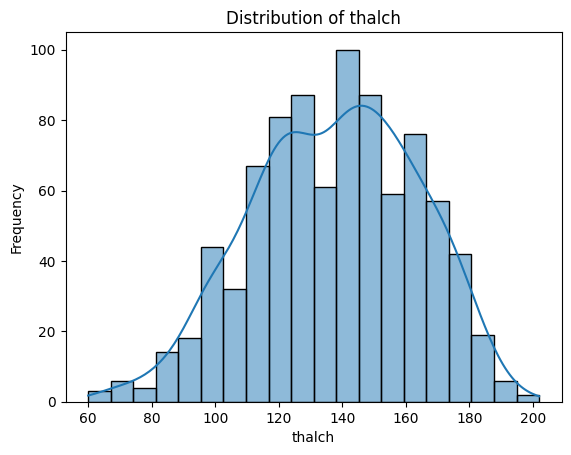

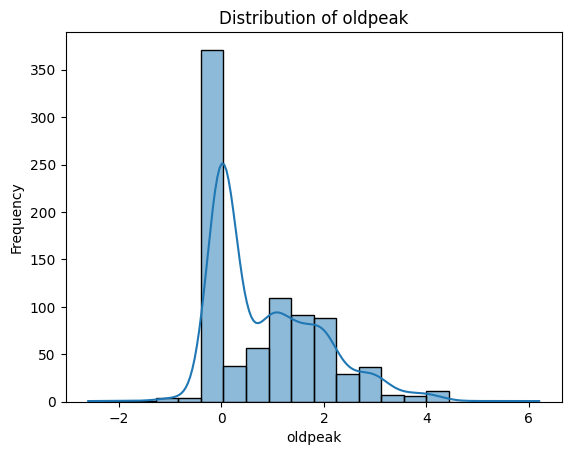

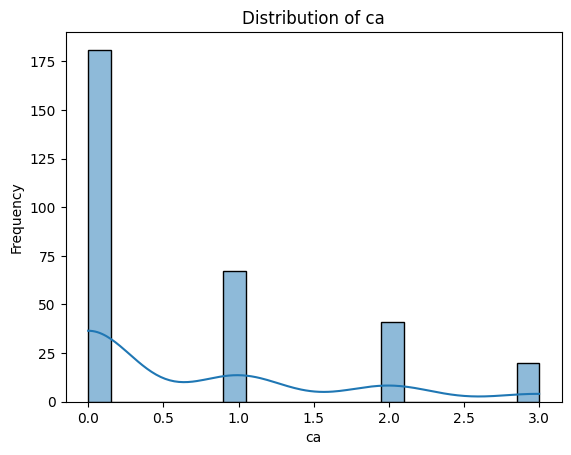

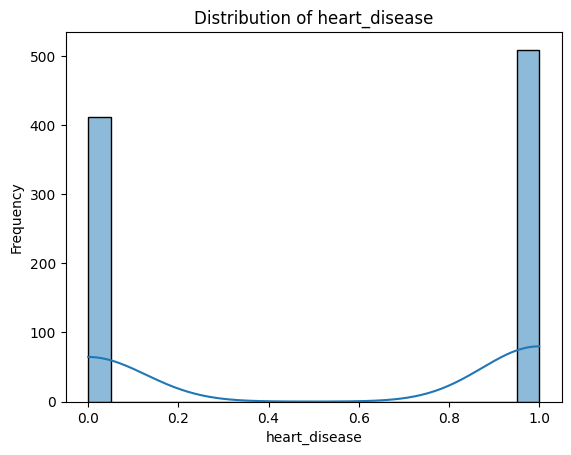

In [10]:
## Histogram
for col in num_cols:
    if col != 'id':
        sns.histplot(data=df, x=col, kde=True, bins=20)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

Most of the data is normally distributed except for the column "oldpeak"

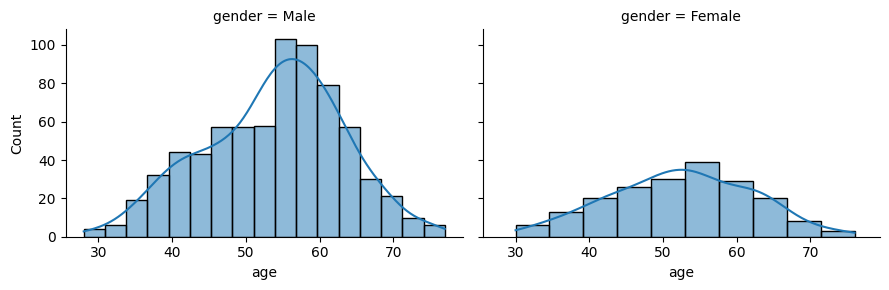

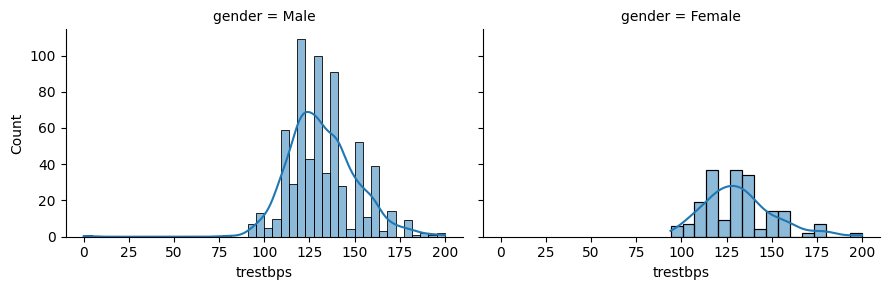

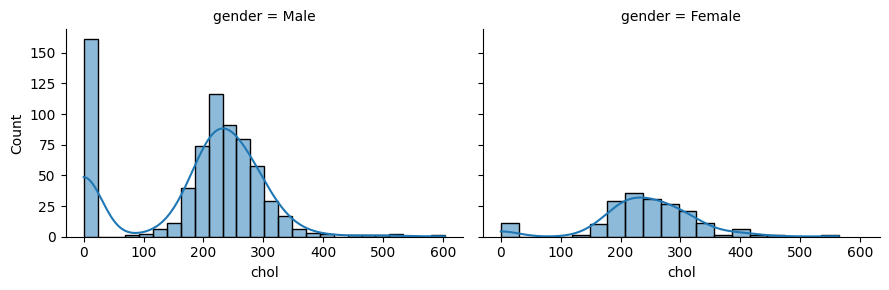

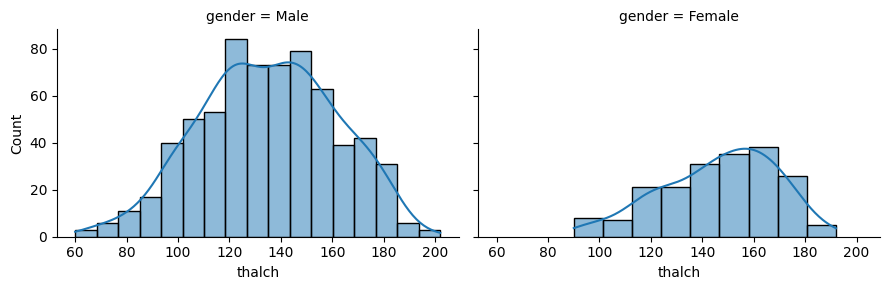

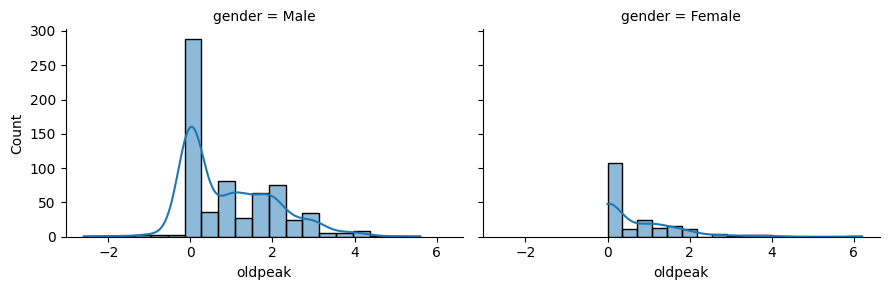

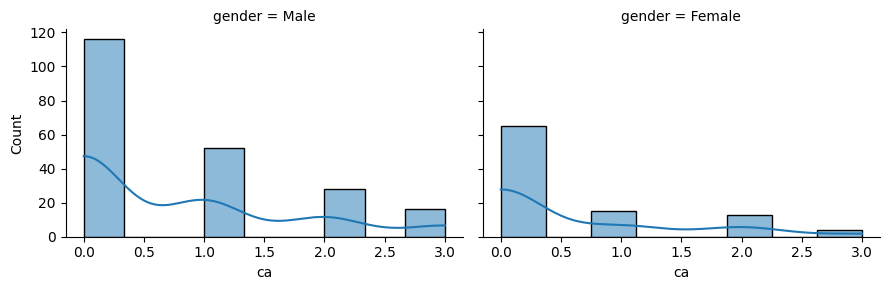

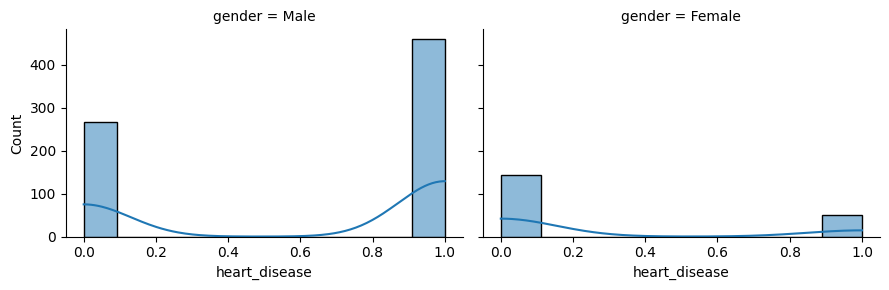

In [11]:
for col in num_cols:
    if col != 'id':
        g = sns.FacetGrid(df, col="gender", aspect=1.5)
        g.map(sns.histplot, col, kde=True)  # Change 'age' to the respective numerical column
        plt.show()

Males show higher peaks in the distribution of most numerical features, such as age, blood pressure, and cholesterol levels. This indicates that male patients generally have higher values across these attributes compared to females

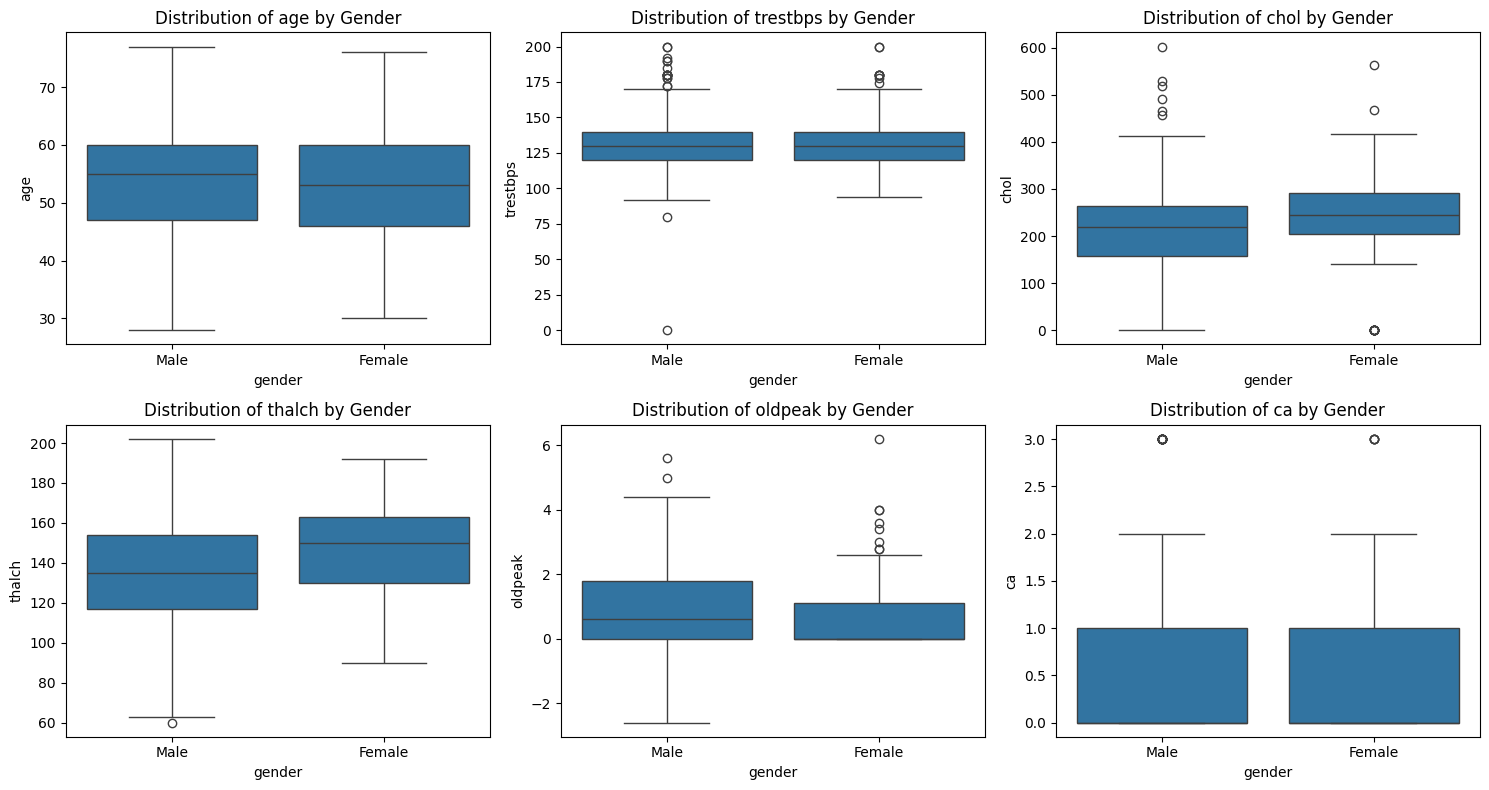

In [12]:
##  Outlier detection
box = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
fig, axes = plt.subplots(2,3, figsize = (15,8))
axes = axes.flatten()

for i, col in enumerate(box):
    sns.boxplot(data = df, x='gender', y = col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Gender")

plt.tight_layout()
plt.show()

- Outliers: Resting blood pressure, cholesterol, ST depression, and the number of colored blood vessels have outliers in both males and females.
- Heart Rate & Cholesterol: Females have a slightly higher average maximum heart rate and cholesterol levels.
- Age: Males admitted to the hospital are generally older than females

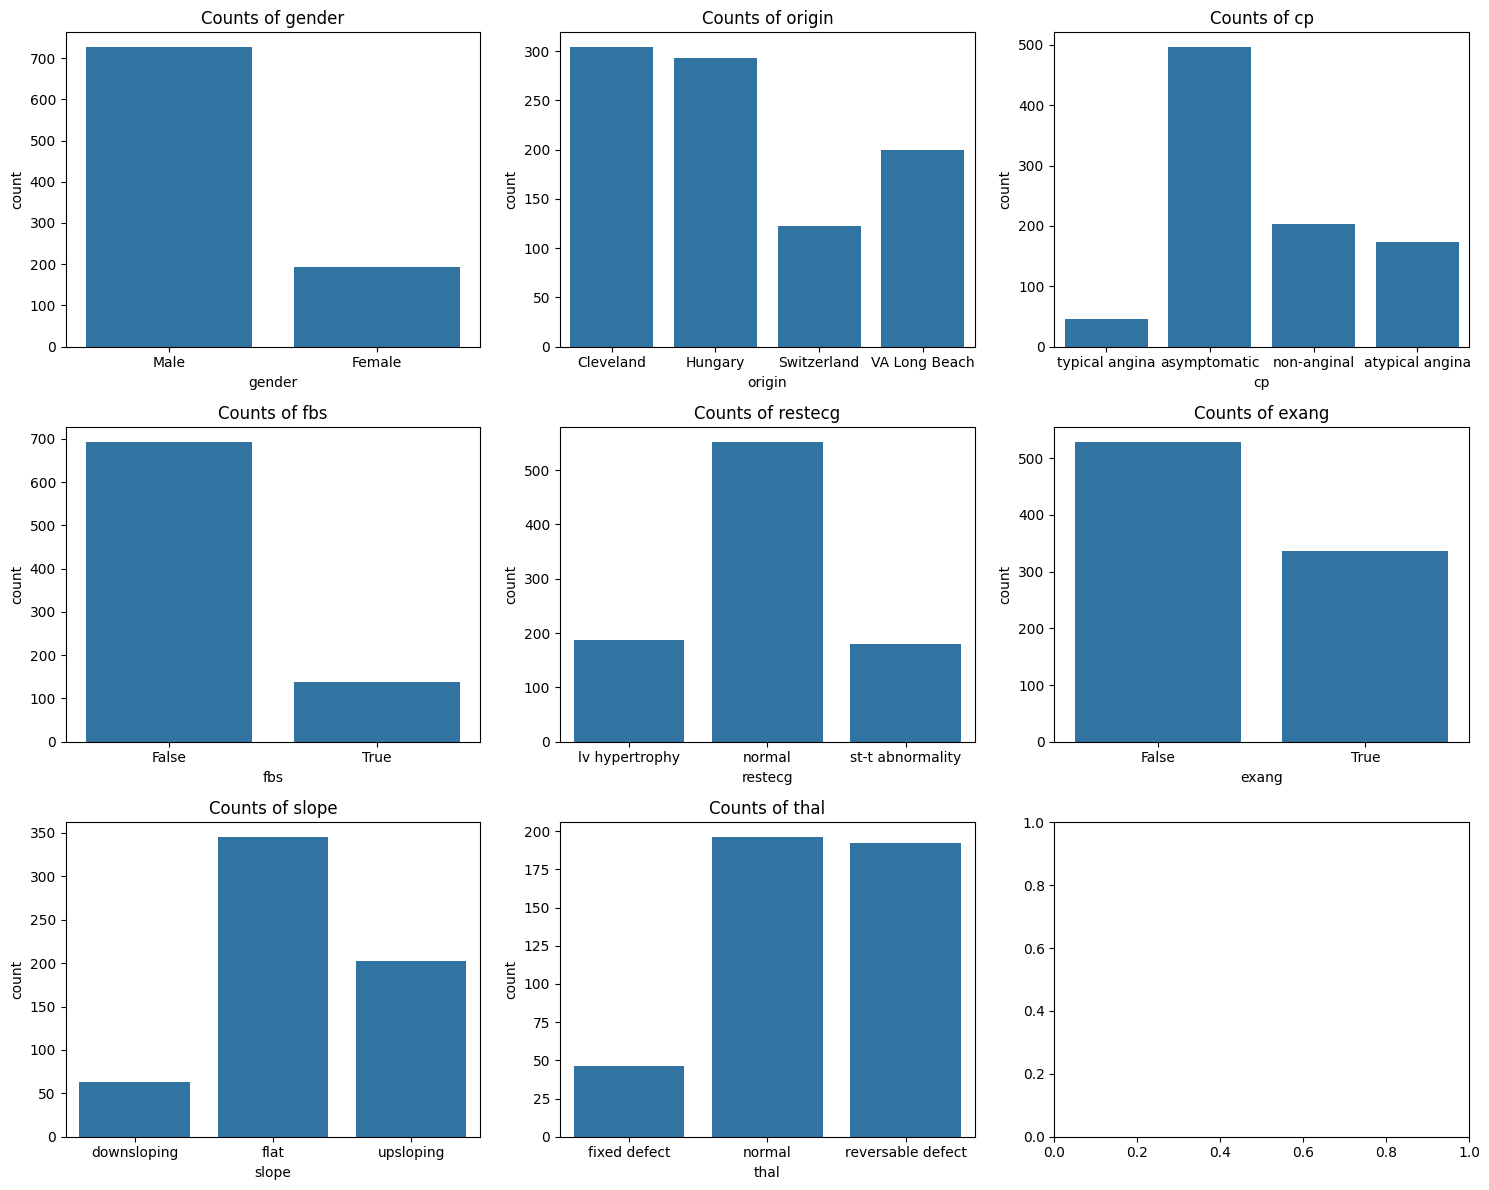

In [13]:
## count plot 
fig, axes = plt.subplots(3,3,figsize = (15,12))
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    sns.countplot( x=df[col], ax = axes[i])
    axes[i].set_title(f'Counts of {col}')
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['id', 'age', 'gender', 'origin', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'heart_disease'],
      dtype='object')

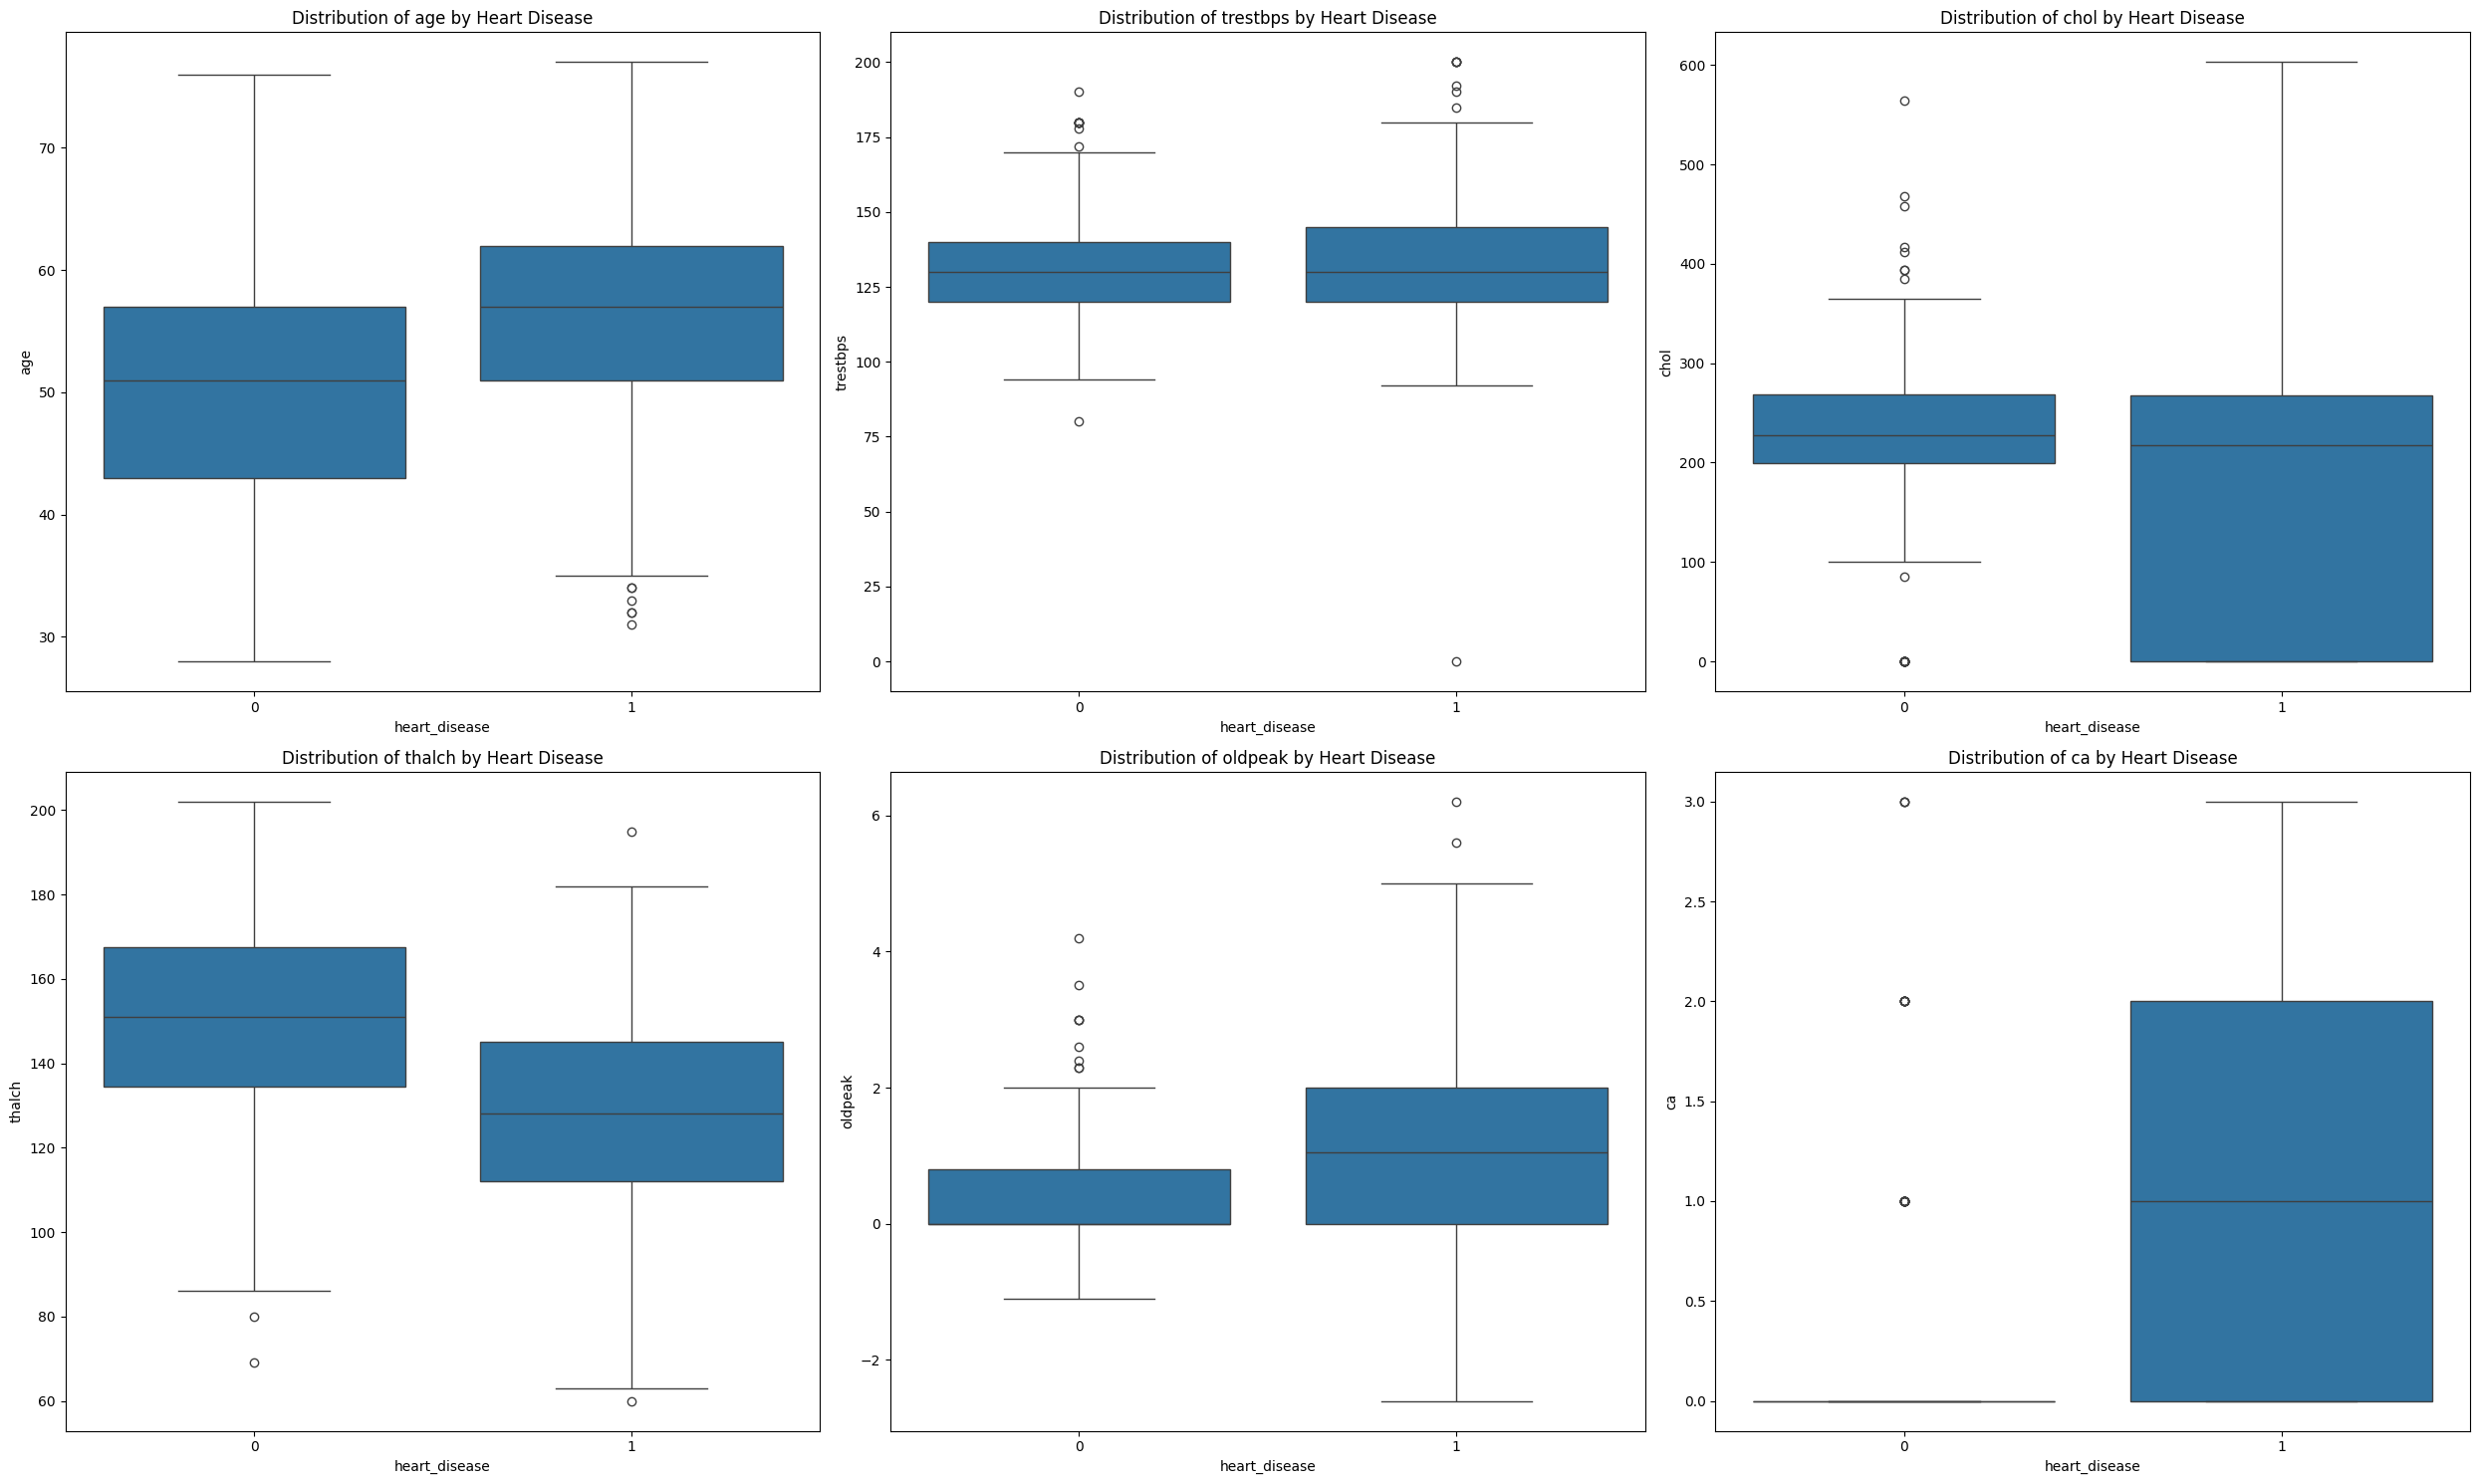

In [32]:
##  Heart Risk against attributes
l = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
axes = axes.flatten()

for i, col in enumerate(l):
    sns.boxplot(data=df, x='heart_disease', y=col, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} by Heart Disease")

plt.tight_layout()
plt.show()

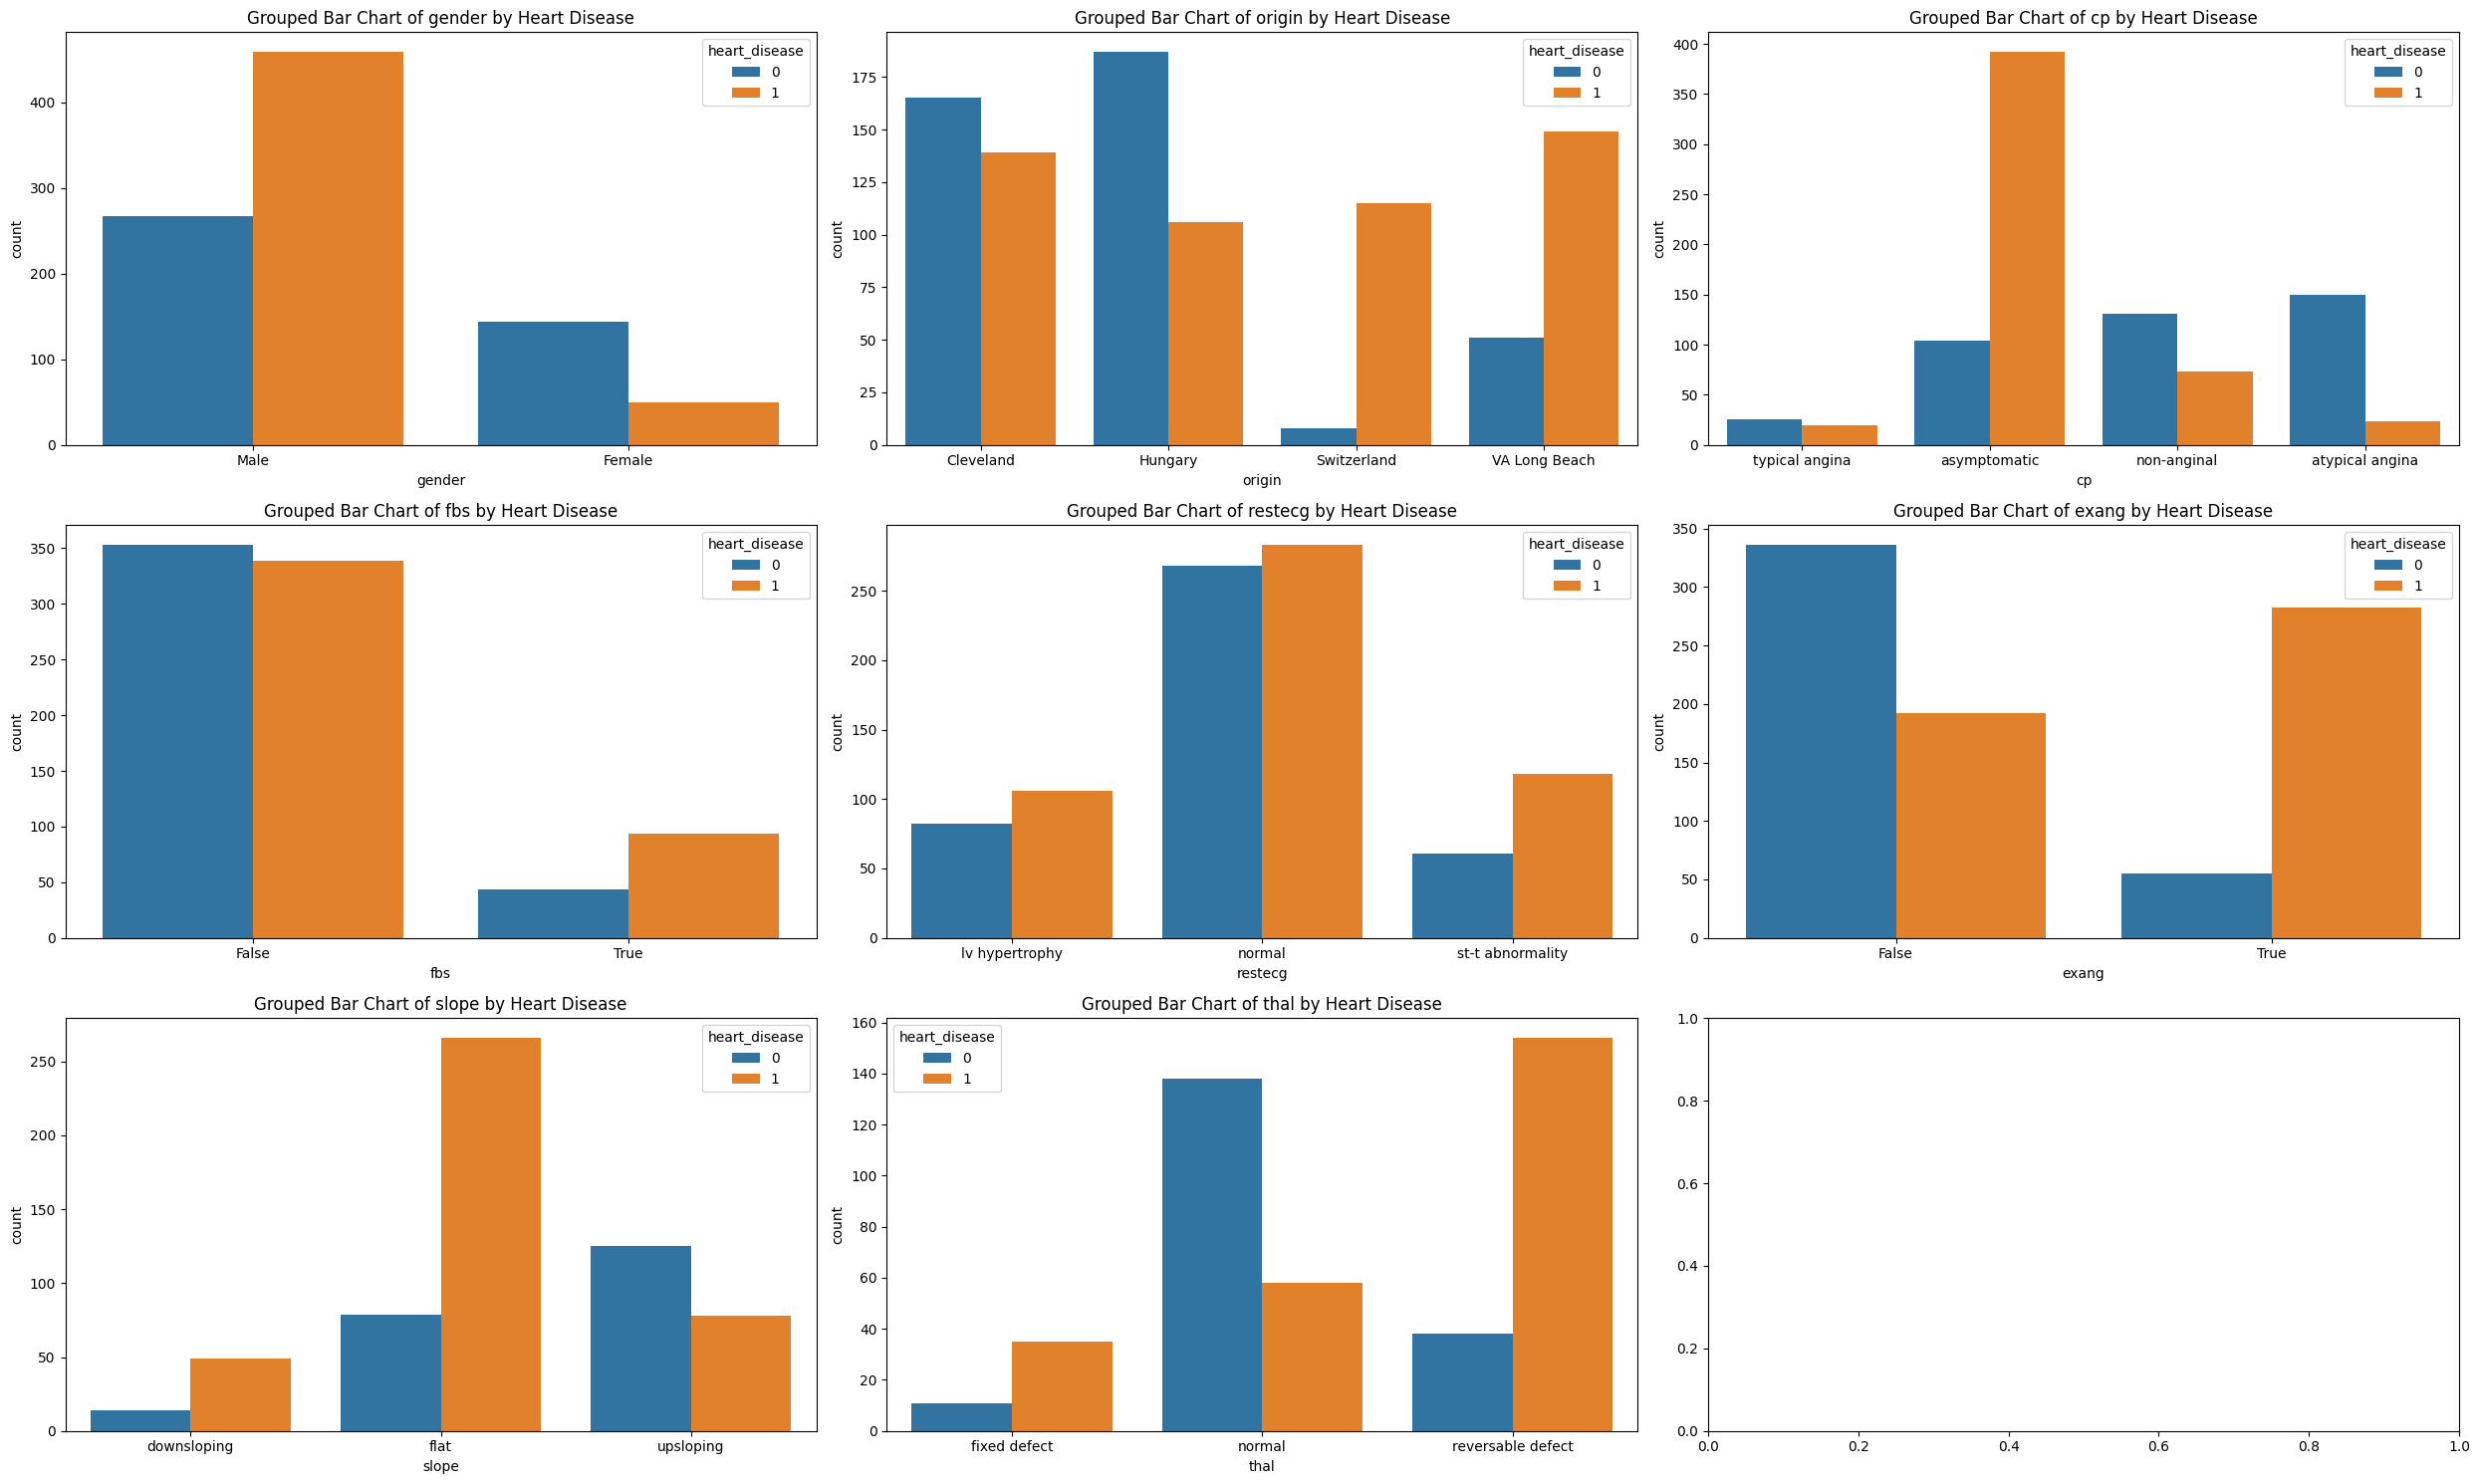

In [35]:

l = ['gender', 'origin', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

fig, axes = plt.subplots(3, 3, figsize=(25, 15))
axes = axes.flatten()

for i, col in enumerate(l):
    sns.countplot(data=df, x=col, hue='heart_disease', ax=axes[i])
    axes[i].set_title(f"Grouped Bar Chart of {col} by Heart Disease")

plt.tight_layout()
plt.show()

Strong Predictors: Age, thalach (max heart rate), oldpeak (ST depression), ca (number of major vessels), chest pain type, and thalassemia.

Moderate Impact: Gender, exercise-induced angina, resting ECG, and ST segment slope.

Weak/No Impact: Resting blood pressure and cholesterol do not show a strong distinction between heart disease and non-heart disease groups.

### Check for the relationship between predictive variables and the target variables

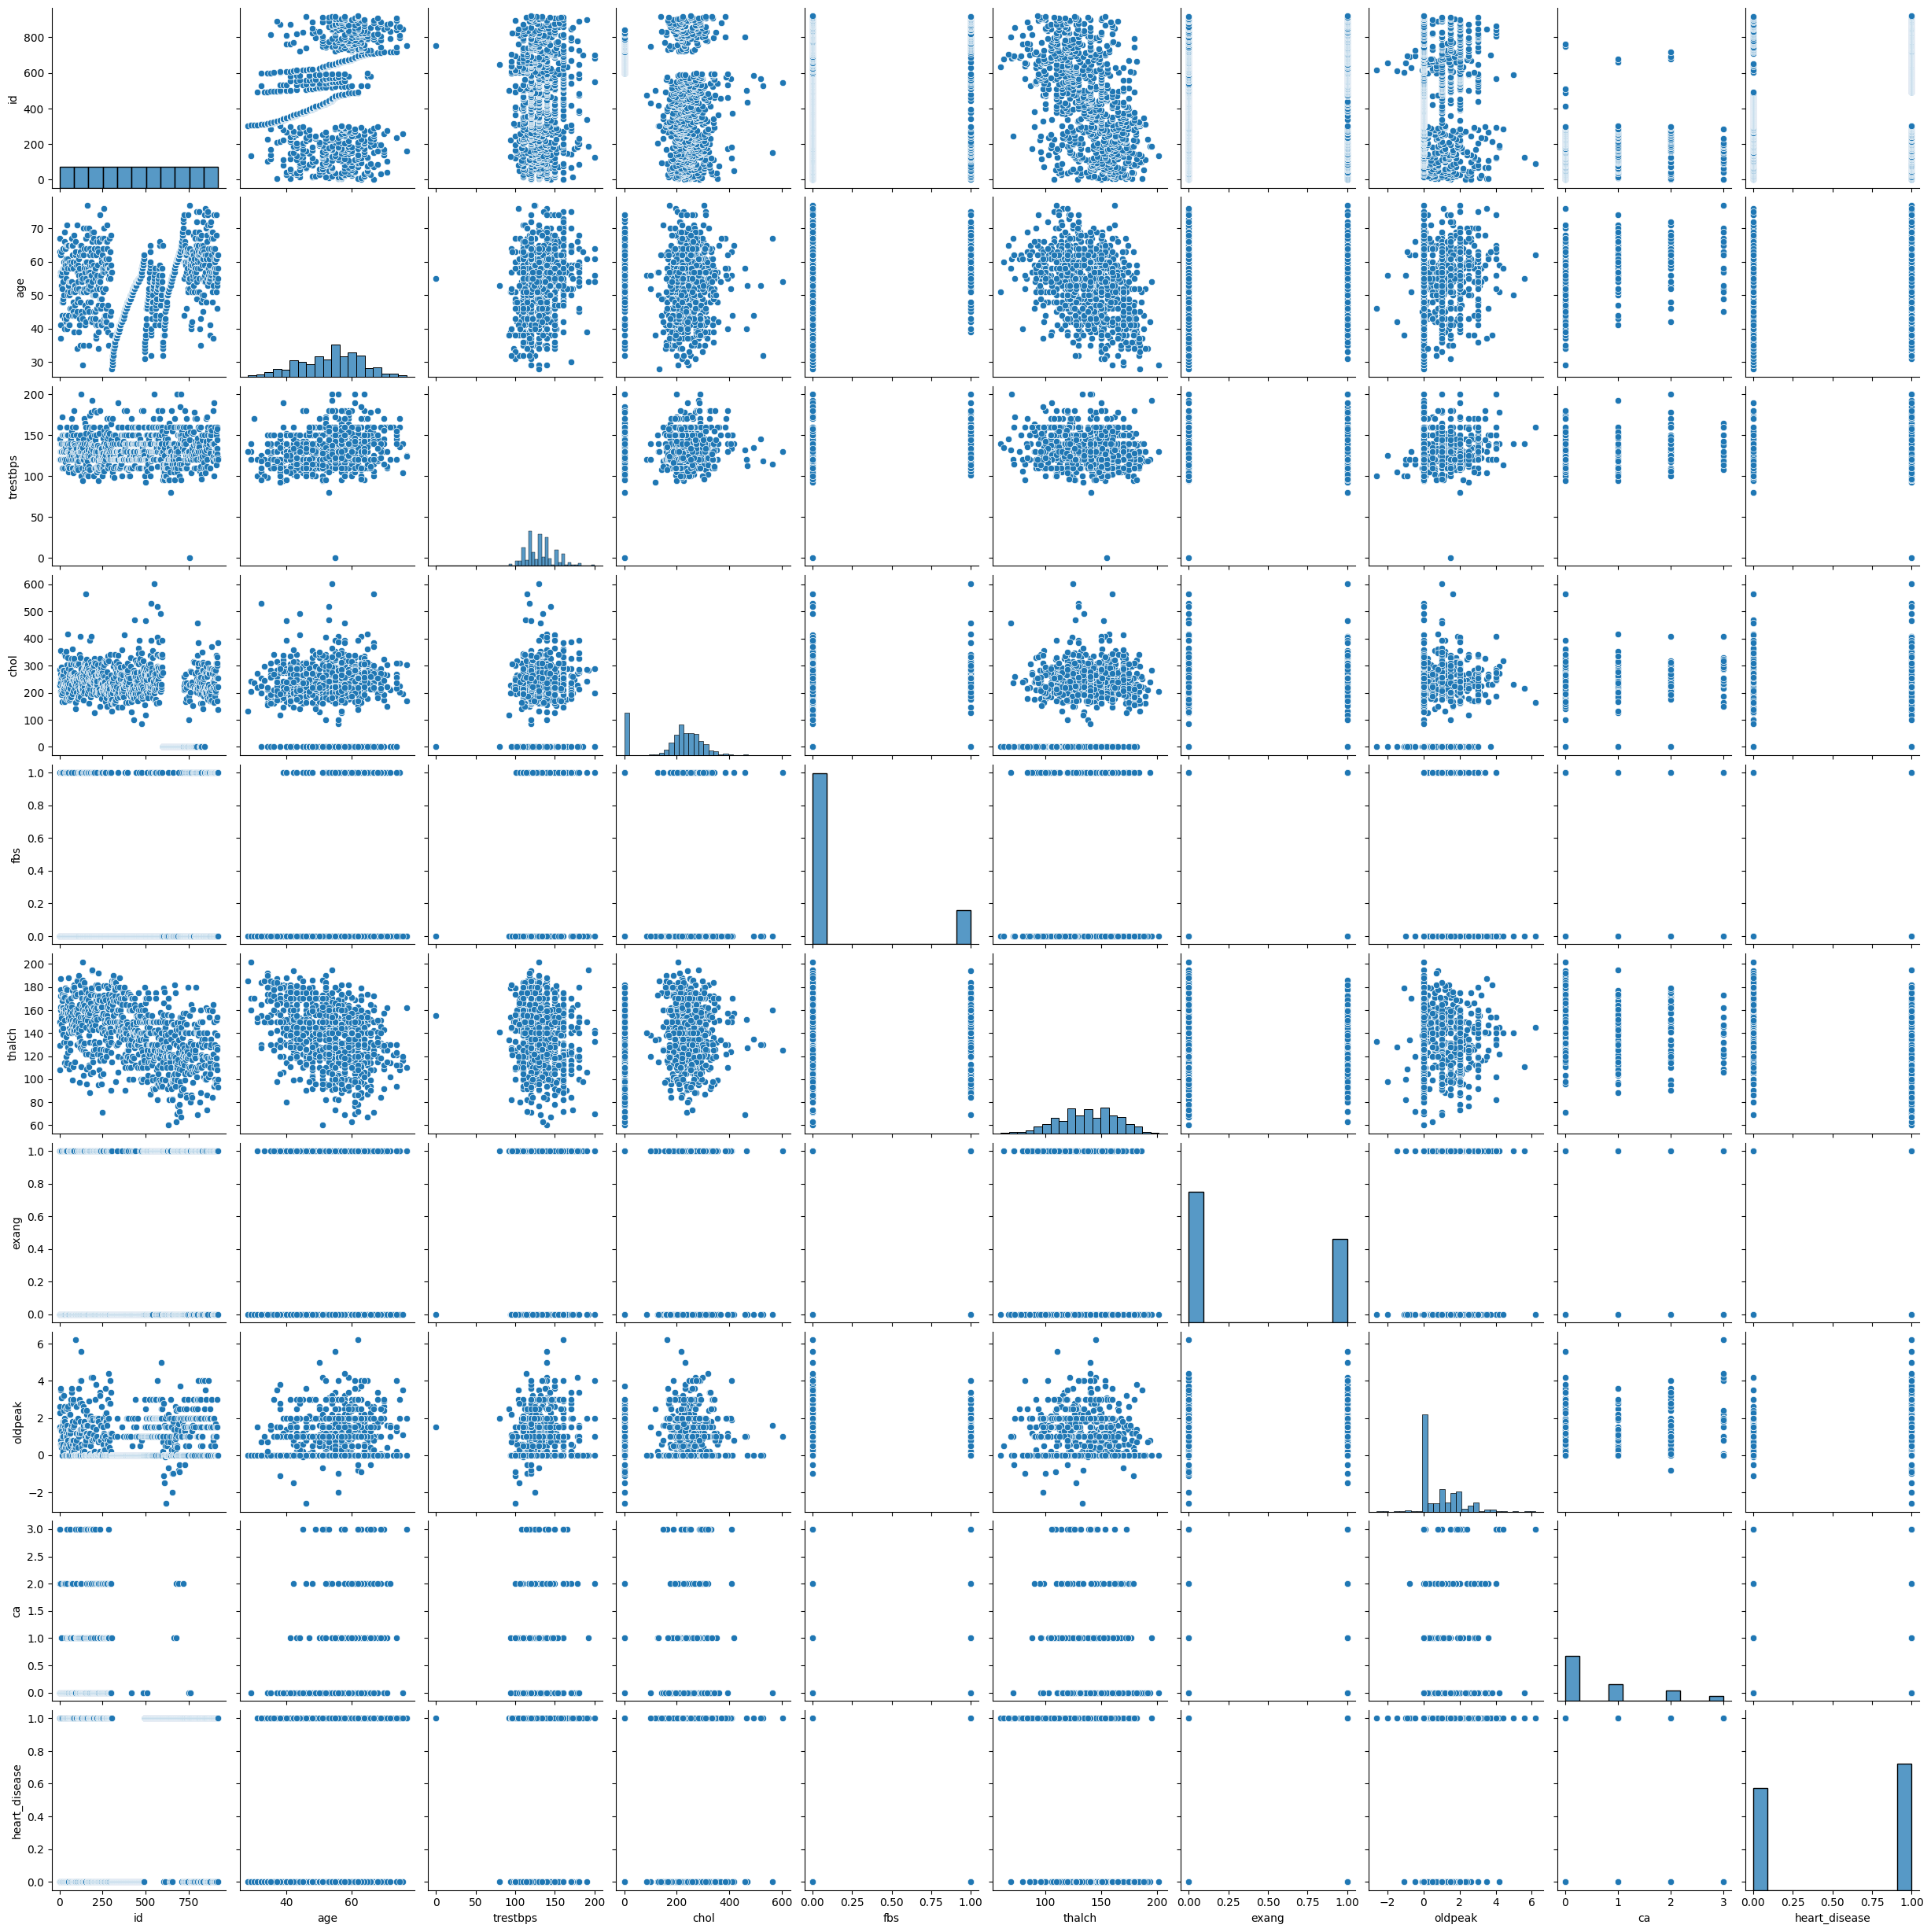

In [14]:
## Check for the linear relationship if any
sns.pairplot(data = df, )
plt.show()

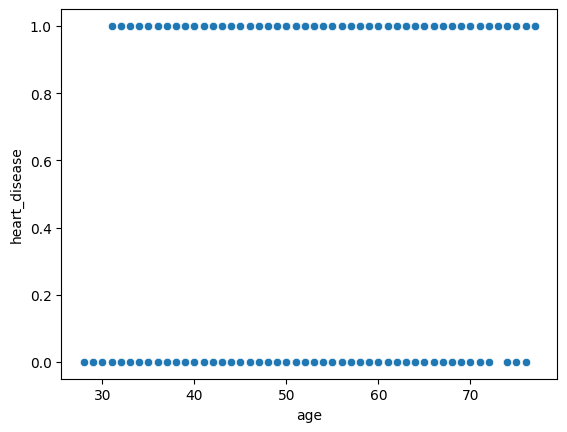

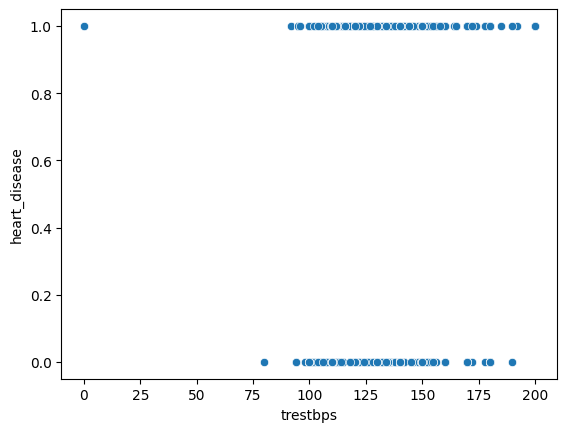

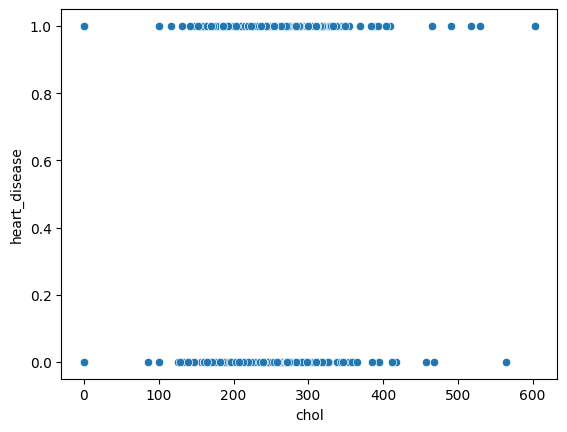

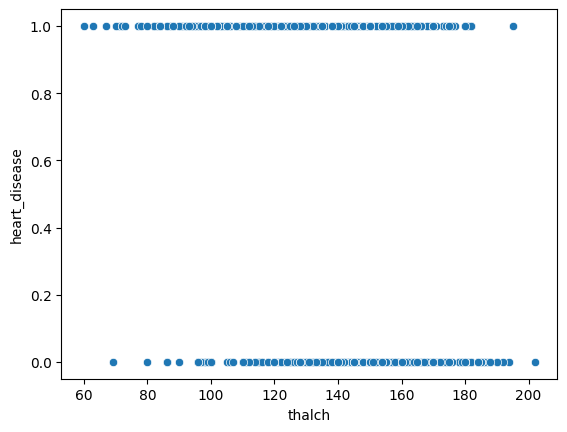

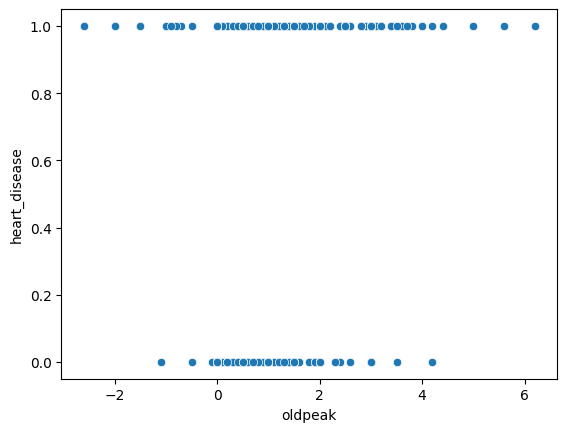

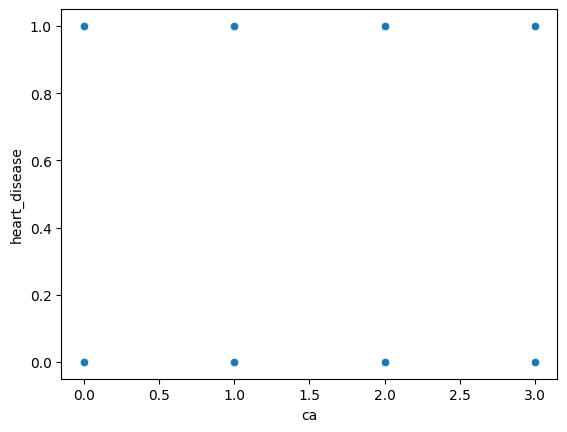

In [15]:
for col in [x for x in df.columns if df[x].dtype != 'O']:
    if col != 'id' and col != 'heart_disease':
        sns.scatterplot(data=df, x=col, y='heart_disease')
        plt.show()

There seems to be no much linear relationship between attributes and target vairaiable. This might affect the learning of the ML models 

## Feature Engineering

In [16]:
df.isnull().sum()

id                 0
age                0
gender             0
origin             0
cp                 0
trestbps          59
chol              30
fbs               90
restecg            2
thalch            55
exang             55
oldpeak           62
slope            309
ca               611
thal             486
heart_disease      0
dtype: int64

In [17]:
## drop the columns slope, ca and thal as they have almost/more than 50% of its values as null
## Also dropiing the id column as it wouldn't help in drawing any conclusions on the heart condition

df = df.drop(columns=['slope','ca','thal','id']).reset_index(drop=True)
df

,age,gender,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,heart_disease
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,0
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,1
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,0


In [18]:
## Examine the classes present in categorical values

for col in cat_cols:
    if col not in df.columns:
        continue
    else:
        print(df[col].value_counts())

gender
Male      726
Female    194
Name: count, dtype: int64
origin
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64
fbs
False    692
True     138
Name: count, dtype: int64
restecg
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64
exang
False    528
True     337
Name: count, dtype: int64


In [19]:
cat_cols = [col for col in df.columns if df[col].dtype == 'O']
num_cols = [col for col in df.columns if col not in cat_cols and col != 'heart_disease']

print("Categorical columns: ", cat_cols)
print("Numerical columns: ",num_cols)

Categorical columns:  ['gender', 'origin', 'cp', 'fbs', 'restecg', 'exang']
Numerical columns:  ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [20]:
## Split the data into train and test sets

X = df.drop(columns=['heart_disease'])
y = df['heart_disease']

In [21]:
y.value_counts()

heart_disease
1    509
0    411
Name: count, dtype: int64

In [22]:
X

,age,gender,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4
...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0
916,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN
917,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0
918,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN


In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(dtype='int'))
])

numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('encoder', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('num', numerical_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])

In [24]:
## Pre-processing and Transformation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## Resample for balanced dataset

### SMOTE Resampling

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_over_sampled, y_over_sampled = ros.fit_resample(X_train, y_train)

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_final, y_train_final = smote.fit_resample(X_over_sampled, y_over_sampled)

from collections import Counter
print("Resampled class distribution:", Counter(y_train_final))


Resampled class distribution: Counter({1: 400, 0: 400})


## Model Training

In [27]:
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(use_label_encoder=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Naive Bayes": GaussianNB(),
    "KNN":KNeighborsClassifier(),
    "SVC":SVC()

}

param = {
    "Decision Tree": {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random']
    },
    
    "Random Forest": {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },
    
    "Gradient Boosting": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 1.0],
        'criterion': ['friedman_mse', 'squared_error']
    },
    
    "Logistic Regression": {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'C': [0.1, 1.0, 10],
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'max_iter': [100, 200, 300]
    },
    
    "XGBClassifier": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'objective': ['binary:logistic'],
        'eval_metric': ['logloss']
    },
    
    "AdaBoost Classifier": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.5, 1.0, 1.5],
        'algorithm': ['SAMME', 'SAMME.R']
    },

    "Naive Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
    },
    
    "KNN": {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },

    "SVC": {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],  # Only for 'poly' kernel
    }
}


In [48]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
report_train = {}
report_test = {}

strat_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for i in tqdm(range(len(list(models)))):
    model = list(models.values())[i]
    params=param[list(models.keys())[i]]

    gs = GridSearchCV(model,params,cv=strat_kf, scoring = ['accuracy', 'f1'], refit = 'accuracy', n_jobs=-1)
    gs.fit(X_train_final,y_train_final)

    model.set_params(**gs.best_params_)
    model.fit(X_train_final,y_train_final)

    #model.fit(X_train, y_train)  # Train model

    y_train_pred = model.predict(X_train_final)

    y_test_pred = model.predict(X_test)

    train_model_score = [
    precision_score(y_train_final, y_train_pred),
    recall_score(y_train_final, y_train_pred),
    f1_score(y_train_final, y_train_pred),
    accuracy_score(y_train_final, y_train_pred)
]

    test_model_score = [
    precision_score(y_test, y_test_pred),
    recall_score(y_test, y_test_pred),
    f1_score(y_test, y_test_pred),
    accuracy_score(y_test, y_test_pred)
]
    report_train[list(models.keys())[i]] = train_model_score
    report_test[list(models.keys())[i]] = test_model_score


 33%|███▎      | 3/9 [05:36<13:11, 131.85s/it]c:\Vipina\FindJ\Resume\GitHub\HeartRiskDetection\venv\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
225 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Vipina\FindJ\Resume\GitHub\HeartRiskDetection\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Vipina\FindJ\Resume\GitHub\HeartRiskDetection\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  Fil

In [49]:
# Creating DataFrame using the values in report_test
df_report_test = pd.DataFrame.from_dict(report_test, orient='index', columns=['precision', 'recall', 'f1', 'accuracy'])
df_report_train = pd.DataFrame.from_dict(report_train, orient='index', columns= ['precision', 'recall', 'f1', 'accuracy'])

In [50]:
df_report_test

,precision,recall,f1,accuracy
Decision Tree,0.873684,0.761468,0.813725,0.793478
Random Forest,0.886792,0.862385,0.874419,0.853261
Gradient Boosting,0.854167,0.752294,0.800000,0.777174
Logistic Regression,0.880000,0.807339,0.842105,0.820652
XGBClassifier,0.892157,0.834862,0.862559,0.842391
AdaBoost Classifier,0.861386,0.798165,0.828571,0.804348
Naive Bayes,0.885417,0.779817,0.829268,0.809783
KNN,0.875000,0.834862,0.854460,0.831522
SVC,0.886598,0.788991,0.834951,0.815217


 "Random Forest": {
        'n_estimators': [100, 200, 300, 400],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']
    },

In [55]:
best_model_score = df_report_test['accuracy'].max()
best_model_name = df_report_test[df_report_test['accuracy']== best_model_score].index[0]
best_model =models[best_model_name]
best_model


RandomForestClassifier(max_features='log2', min_samples_leaf=4,
                       min_samples_split=5)

Random Forest Classifier is performing better than all the other models 

## Prediction

In [76]:
input_data = dict(age = 54,
gender = 'Female',
origin = 'VA Long Beach',
cp = 'asymptomatic',
trestbps = 122,
chol = 300,
fbs = False,
restecg = 'lv hypertrophy',
thalch = 129.0,
exang = True,
oldpeak = 2.6)

input_df = pd.DataFrame([input_data])

input_df_transformed = preprocessor.transform(input_df)

prediction = best_model.predict(input_df_transformed)




In [78]:
if prediction[0] > 0.5:
    print('The patient is possibly suffering from a heart condition')
else:
    print('It is unlikely that the patient has a heart condition')

The patient is possibly suffering from a heart condition
